In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [560]:
def preprocess(df):
    columns = df.columns.str.split(';')
    df = df['ptime;time;windspeed [m/s];power [relative]'].str.split(pat = ';', expand = True)
    df.columns = ['ptime', 'time', 'windspeed', 'power']
    df['date'] = df.time.str.split(pat = ' ', expand = True)[0]
    df['time'] = df.time.str.split(pat = ' ', expand = True)[1]
    df['hours'] = df.time.str.split(pat = ':', expand = True)[0]
    
    df[['power', 'windspeed']] = df[['power', 'windspeed']].astype('float64')
    df['hours'] = df['hours'].astype('int')
    
    return df

## Data preprocessing and EDA

In [589]:
measurement = pd.read_csv('measurement.csv')
measurement

,ptime;time;windspeed [m/s];power [relative]
0,2019-11-01;2019-11-01 01:00:00;7.47;0.32
1,2019-11-01;2019-11-01 02:00:00;7.62;0.22
2,2019-11-01;2019-11-01 03:00:00;8.35;0.27
3,2019-11-01;2019-11-01 04:00:00;8.13;0.12
4,2019-11-01;2019-11-01 05:00:00;7.73;0.25
...,...
1225,2019-12-20;2019-12-22 02:00:00;9.64;0.55
1226,2019-12-20;2019-12-22 03:00:00;9.28;0.94
1227,2019-12-20;2019-12-22 04:00:00;7.53;0.35
1228,2019-12-20;2019-12-22 05:00:00;6.47;0.09


In [590]:
#pre processing dataframe to obtain seperate columns
measurement = preprocess(measurement)
measurement

,ptime,time,windspeed,power,date,hours
0,2019-11-01,01:00:00,7.47,0.32,2019-11-01,1
1,2019-11-01,02:00:00,7.62,0.22,2019-11-01,2
2,2019-11-01,03:00:00,8.35,0.27,2019-11-01,3
3,2019-11-01,04:00:00,8.13,0.12,2019-11-01,4
4,2019-11-01,05:00:00,7.73,0.25,2019-11-01,5
...,...,...,...,...,...,...
1225,2019-12-20,02:00:00,9.64,0.55,2019-12-22,2
1226,2019-12-20,03:00:00,9.28,0.94,2019-12-22,3
1227,2019-12-20,04:00:00,7.53,0.35,2019-12-22,4
1228,2019-12-20,05:00:00,6.47,0.09,2019-12-22,5


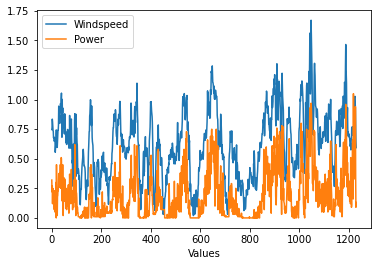

In [614]:
# Comparing distribution of windspeed and power
plt.plot(measurement.windspeed/10)
plt.plot(measurement.power)
plt.xlabel("Values")

plt.legend(["Windspeed", "Power"])

#### From above plot, it can be seen that power and wind has strong correlation. 

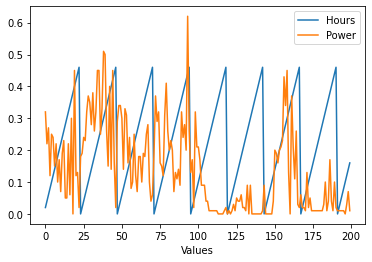

In [613]:
# Comparing distribution of windspeed and power
plt.plot(measurement.hours[:200]/50)
plt.plot(measurement.power[:200])

plt.xlabel("Values")
#plt.ylabel("Power")
plt.legend(["Hours", "Power"])

#### I will work only with windspeed, hours and power for predictions as date does not look to have much influence on the model.

In [429]:
# checking null values in the data
measurement.isna().sum().sum()

0

In [431]:
measurement.describe()

,windspeed,power,hours
count,1230.000000,1230.000000,1230.000000
mean,6.277439,0.190943,11.460976
std,2.806720,0.199379,6.931586
min,0.200000,0.000000,0.000000
25%,4.250000,0.030000,5.000000
50%,6.310000,0.130000,11.000000
75%,8.227500,0.290000,17.000000
max,16.710000,1.050000,23.000000


### Train and Test datatset

I am using forecast datatset as test datatset and measurement datatset as train set.

In [592]:
forecast = pd.read_csv('forecast.csv')
forecast = preprocess(forecast)
X = np.column_stack((measurement.windspeed, measurement.hours))
y = measurement.power

X_forecast = np.column_stack((np.array(forecast.windspeed), np.array(forecast.hours)))
y_forecast = np.array(forecast.power).reshape(-1,1)

y_forecast_predict = dt_regr.predict(X_forecast)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train = X
X_test = X_forecast
y_train = y
y_test = y_forecast

## Linear Regression as baseline model

0.5886024193797486


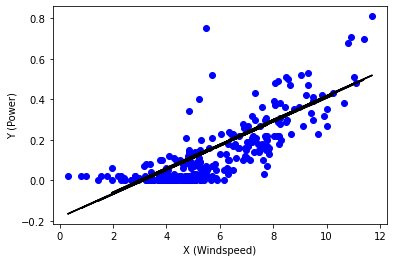

In [615]:
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.scatter(X_test.astype('float64')[:,0], y_test.astype('float64'), color ='b')
plt.plot(X_test.astype('float64')[:, 0], y_pred.astype('float64'), color ='k')
plt.xlabel("X (Windspeed)")
plt.ylabel("Y (Power)")
#plt.legend(["Ground Truth", "Predicted"])
plt.show()
# Data scatter of predicted values

In [594]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.0792486813448155
MSE: 0.010539518433173072
RMSE: 0.1026621567724596


## Decsision Tree

In [595]:
dt_regr = DecisionTreeRegressor()
dt_regr.fit(X, y)
dt_regr.score(X_test, y_test)

0.4451379772967784

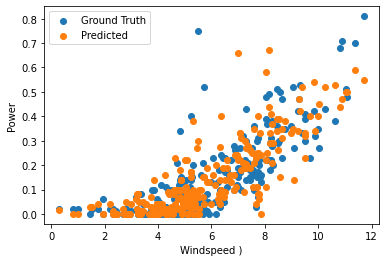

In [616]:
y_pred_dt = dt_regr.predict(X_test)

plt.scatter(X_test.astype('float64')[:,0], y_test.astype('float64'))
plt.scatter(X_test.astype('float64')[:, 0], y_pred_dt.astype('float64'))
plt.xlabel("Windspeed )")
plt.ylabel("Power")
plt.legend(["Ground Truth", "Predicted"])
plt.show()
# Data scatter of predicted values



In [597]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_dt)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred_dt) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred_dt,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.07901851851851852
MSE: 0.014214907407407409
RMSE: 0.11922628656218145


## SVM Regression

In [598]:
from sklearn import svm
svm = svm.SVR()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6367343427349701

In [599]:
y_predict_svm = svm.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_predict_svm)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_predict_svm) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_predict_svm,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.07385888196513297
MSE: 0.00930643560205479
RMSE: 0.09646986888171244


By comparing loss function of all models, we can clearly see that SVM is performing better. So, I will use it as my final model to do predictions. Even though from plots its look like that Decission Trees are predicting better than exact values, but it also predicts wrong values having greater distance from actual value.

## Forecasting

In [577]:
forecast

,ptime,time,windspeed,power,date,hours
0,2019-12-21,01:00:00,7.29,0.14,2019-12-21,1
1,2019-12-21,02:00:00,7.07,0.17,2019-12-21,2
2,2019-12-21,03:00:00,7.27,0.20,2019-12-21,3
3,2019-12-21,04:00:00,7.46,0.15,2019-12-21,4
4,2019-12-21,05:00:00,6.89,0.26,2019-12-21,5
...,...,...,...,...,...,...
265,2019-12-30,02:00:00,5.72,0.52,2020-01-01,2
266,2019-12-30,03:00:00,5.31,0.00,2020-01-01,3
267,2019-12-30,04:00:00,5.25,0.09,2020-01-01,4
268,2019-12-30,05:00:00,5.22,0.14,2020-01-01,5


In [601]:
y_forecast_predict = svm.predict(X_forecast)

In [607]:

for i in range(0, len(y_forecast)):
    print('actual : ' , y_forecast[i],'  prediction:  ',  "{0:0.2f}".format(y_forecast_predict[i]))

actual :  [0.14]   prediction:   0.23
actual :  [0.17]   prediction:   0.21
actual :  [0.2]   prediction:   0.22
actual :  [0.15]   prediction:   0.23
actual :  [0.26]   prediction:   0.18
actual :  [0.05]   prediction:   0.13
actual :  [0.]   prediction:   0.08
actual :  [0.]   prediction:   0.08
actual :  [0.1]   prediction:   0.14
actual :  [0.19]   prediction:   0.19
actual :  [0.21]   prediction:   0.19
actual :  [0.18]   prediction:   0.22
actual :  [0.21]   prediction:   0.21
actual :  [0.21]   prediction:   0.24
actual :  [0.22]   prediction:   0.24
actual :  [0.11]   prediction:   0.19
actual :  [0.1]   prediction:   0.18
actual :  [0.24]   prediction:   0.16
actual :  [0.32]   prediction:   0.21
actual :  [0.13]   prediction:   0.25
actual :  [0.49]   prediction:   0.28
actual :  [0.03]   prediction:   0.25
actual :  [0.48]   prediction:   0.29
actual :  [0.3]   prediction:   0.43
actual :  [0.43]   prediction:   0.51
actual :  [0.41]   prediction:   0.45
actual :  [0.3]   pr

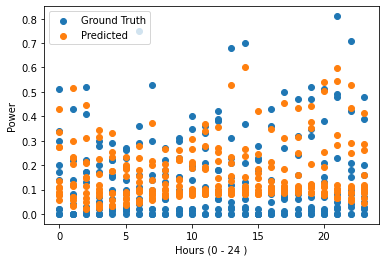

In [608]:
plt.scatter(X_forecast[:,1], y_forecast)
plt.scatter(X_forecast[:,1], y_forecast_predict)
plt.xlabel("Hours (0 - 24 )")
plt.ylabel("Power")
plt.legend(["Ground Truth", "Predicted"])

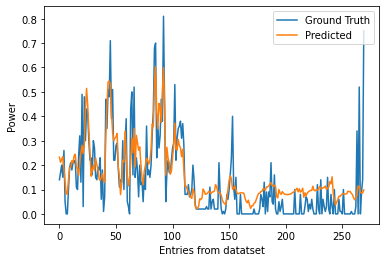

In [609]:
plt.plot(y_forecast)
plt.plot(y_forecast_predict)
plt.xlabel("Entries from datatset")
plt.ylabel("Power")
plt.legend(["Ground Truth", "Predicted"])

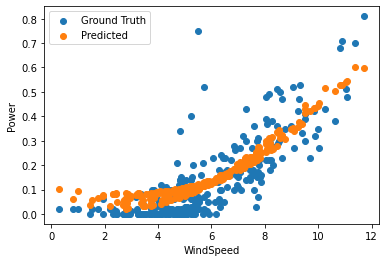

In [611]:
plt.scatter(X_forecast[:,0], y_forecast)
plt.scatter(X_forecast[:,0], y_forecast_predict)

plt.xlabel("WindSpeed")
plt.ylabel("Power")
plt.legend(["Ground Truth", "Predicted"])

Conclusion:
    
- Overall performance was better with SVM regression model.

- Performance of Decision Tree was very good when only trained and tested with measurement data. I suppose it was overfitting.

- ANother thing that can be tried is to split both dates into day, month and year seperate columns and see if any of them have any correlation with power.